In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
rw=pd.read_csv("RandWalk.csv")
rw.date=pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date",inplace= True)
rw=rw.asfreq('b')
rw.describe()
rw


,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [18]:
size=int(len(rw)*0.8)
rw_train =rw.iloc[:size]
rw_test=rw.iloc[size:]
wn=np.random.normal(loc=rw_train.price.mean(),scale=rw_train.price.std(),size=len(rw_train))
rw_train['wn']= wn
rw_train.describe()

<ipython-input-18-f9a375007999>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_train['wn']= wn


,price,rw,wn
count,4016.000000,4016.000000,4016.000000
mean,1102.830863,1102.830863,1096.820757
std,270.719551,270.719551,274.880368
min,585.483034,585.483034,6.174125
25%,891.556263,891.556263,910.003280
50%,1063.245463,1063.245463,1100.370094
75%,1285.576713,1285.576713,1283.578361
max,1912.377160,1912.377160,2182.859650


Text(0.5, 1.0, 'white noise Time-series')

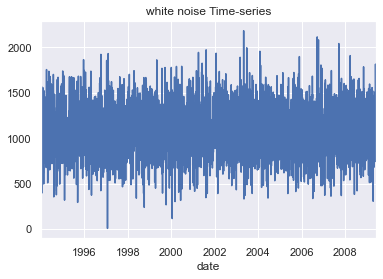

In [19]:
rw_train.wn.plot()
plt.title("white noise Time-series") 

<AxesSubplot:xlabel='date'>

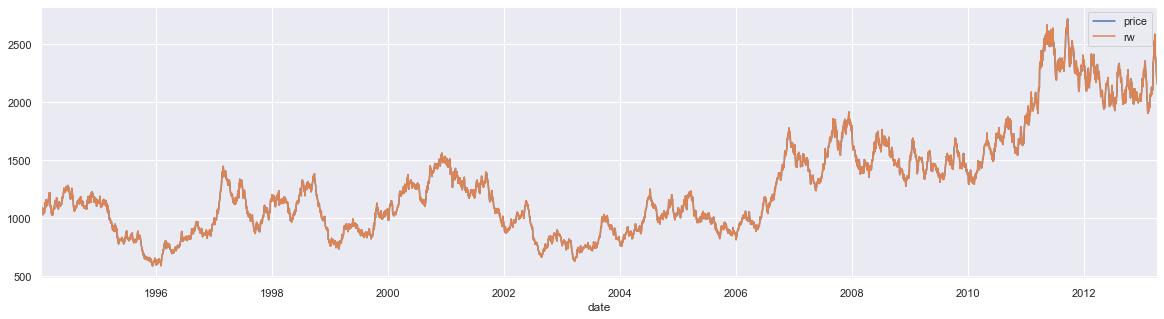

In [20]:
rw.plot(figsize=(20,5))
plt.title("Rand")